In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
plt.rcParams['figure.figsize'] = [15, 7] 
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv')

# Data Assessment

## Summary

This dataset contains various physicochemical properties and quality ratings for red wine samples. The features (fixed acidity, volatile acidity, citric acid, etc.) are used to predict the quality of the wine, which is rated on a scale from 0 to 10. 

## Column Descriptions

- **fixed acidity**: Fixed acids that do not evaporate easily (g/L).
- **volatile acidity**: Acids that evaporate and affect aroma and taste (g/L).
- **citric acid**: Weak acid adding freshness and flavor (g/L).
- **residual sugar**: Sugar remaining after fermentation (g/L).
- **chlorides**: Amount of salt in the wine (g/L).
- **free sulfur dioxide**: Unbound SO2 acting as antimicrobial and antioxidant (mg/L).
- **total sulfur dioxide**: Both bound and free forms of SO2 (mg/L).
- **density**: Mass per unit volume, affected by sugar and alcohol (g/cm³).
- **pH**: Acidity or alkalinity level of wine (pH scale).
- **sulphates**: Added to prevent spoilage and oxidation (g/L).
- **alcohol**: Alcohol content in the wine (% vol).
- **quality**: Quality score based on sensory data (0 to 10 scale).

## Issues with Dataset

1. Dirty Data
   - 240 rows are duplicated

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df[df<0].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [9]:
df[(df['alcohol']>100) | (df['alcohol']<0)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# Data Cleaning

In [10]:
import copy
df1 = df.copy(deep=True)

In [11]:
# Removing suplicated columns
df1 = df1.drop_duplicates()
df1[df1.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# Exploratory Data Analysis

## What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

**`Conclusion:`**

- Most wines have a quality score of 5; quality ranges from 3 (min) to 8 (max), showing a slight right skew.

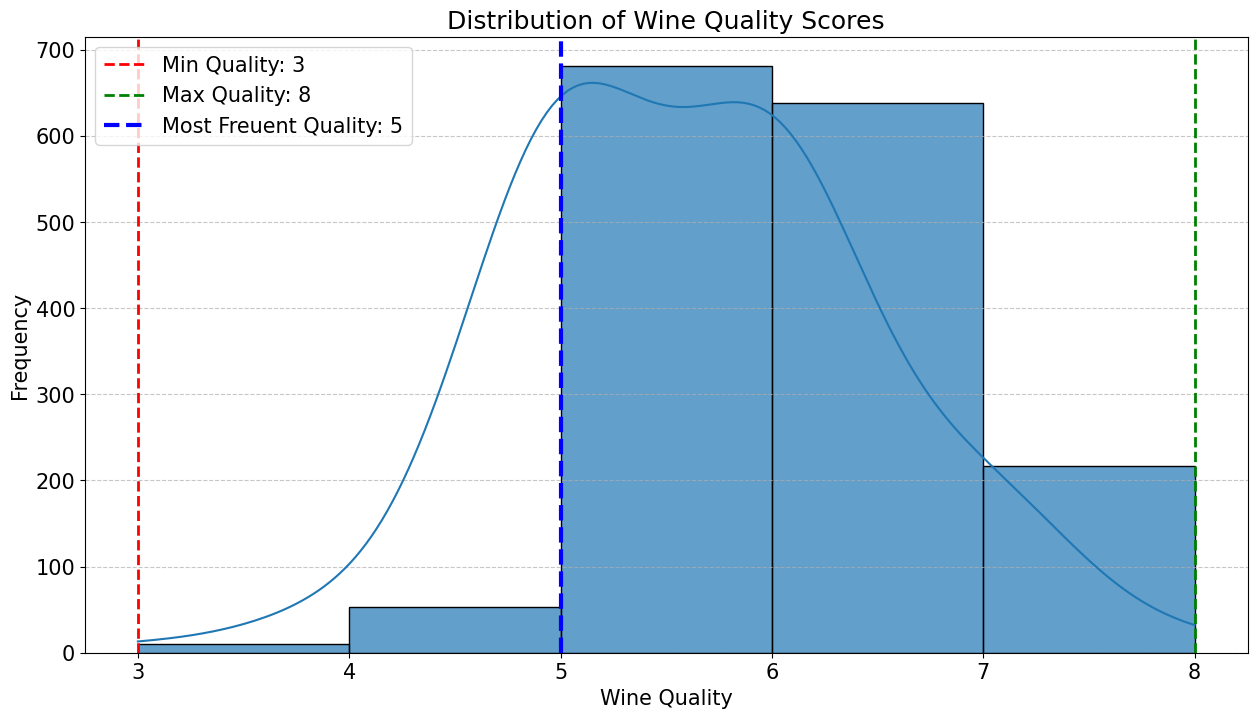

In [12]:
most_frequent_quality = df1['quality'].mode()[0]

# Find the highest and lowest quality ratings
max_quality = df1['quality'].max()
min_quality = df1['quality'].min()

plt.figure(figsize=(15, 8))
sns.histplot(df['quality'],kde=True,bins=5, edgecolor='black', alpha=0.7,kde_kws={'bw_adjust':2.5})
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.xticks(range(min_quality, max_quality + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for min and max quality
plt.axvline(min_quality, color='red', linestyle='--', linewidth=2, label=f'Min Quality: {min_quality}')
plt.axvline(max_quality, color='green', linestyle='--', linewidth=2, label=f'Max Quality: {max_quality}')
plt.axvline(most_frequent_quality, color='blue', linestyle='--', linewidth=3, label=f'Most Freuent Quality: {most_frequent_quality}')

# Add legend
plt.legend()

# Show the plot
plt.show()

## How is `fixed acidity` correlated to the quality of the wine? How does the `alcohol` content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

**`Conclusion:`**

- `Fixed Acidity`: Weak positive effect on quality (0.12).
- `Alcohol`: Moderate positive effect on quality (0.48).
- `Free Sulphur Dioxide`: Negligible effect on quality (-0.05).

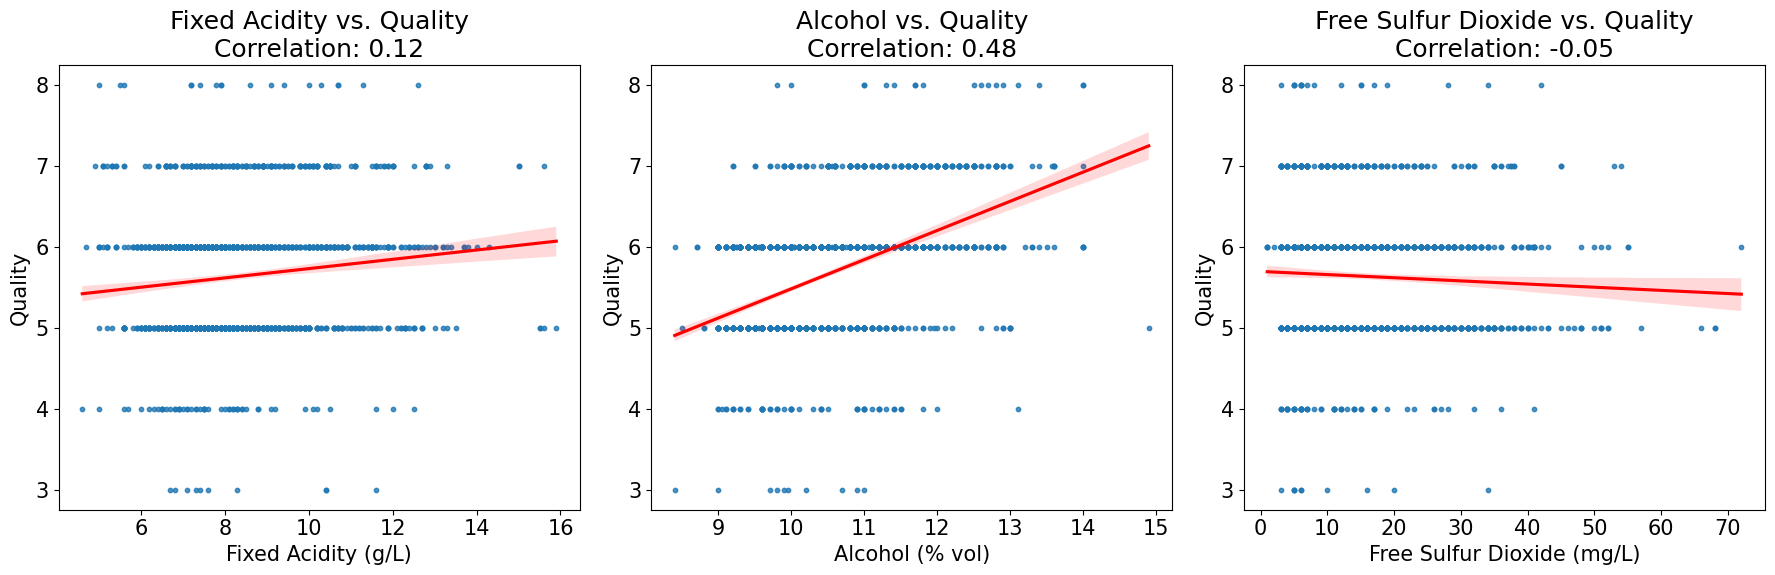

In [13]:
# Calculate the correlation coefficients between 'quality' and the features of interest
correlation_fixed_acidity = df['fixed acidity'].corr(df['quality'])
correlation_alcohol = df['alcohol'].corr(df['quality'])
correlation_free_sulfur_dioxide = df['free sulfur dioxide'].corr(df['quality'])

# Plotting scatter plots with regression lines for each feature against wine quality

# Set up the matplotlib figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Fixed Acidity vs. Quality
sns.regplot(ax=axes[0], x='fixed acidity', y='quality', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
axes[0].set_title(f'Fixed Acidity vs. Quality\nCorrelation: {correlation_fixed_acidity:.2f}')
axes[0].set_xlabel('Fixed Acidity (g/L)')
axes[0].set_ylabel('Quality')

# Scatter plot for Alcohol vs. Quality
sns.regplot(ax=axes[1], x='alcohol', y='quality', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
axes[1].set_title(f'Alcohol vs. Quality\nCorrelation: {correlation_alcohol:.2f}')
axes[1].set_xlabel('Alcohol (% vol)')
axes[1].set_ylabel('Quality')

# Scatter plot for Free Sulfur Dioxide vs. Quality
sns.regplot(ax=axes[2], x='free sulfur dioxide', y='quality', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
axes[2].set_title(f'Free Sulfur Dioxide vs. Quality\nCorrelation: {correlation_free_sulfur_dioxide:.2f}')
axes[2].set_xlabel('Free Sulfur Dioxide (mg/L)')
axes[2].set_ylabel('Quality')

# Adjust layout
plt.tight_layout()
plt.show()



## What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

**`Conclusion:`**

- Residual sugar is almost the same for both low and high-quality wines, with only a -2.17% difference.

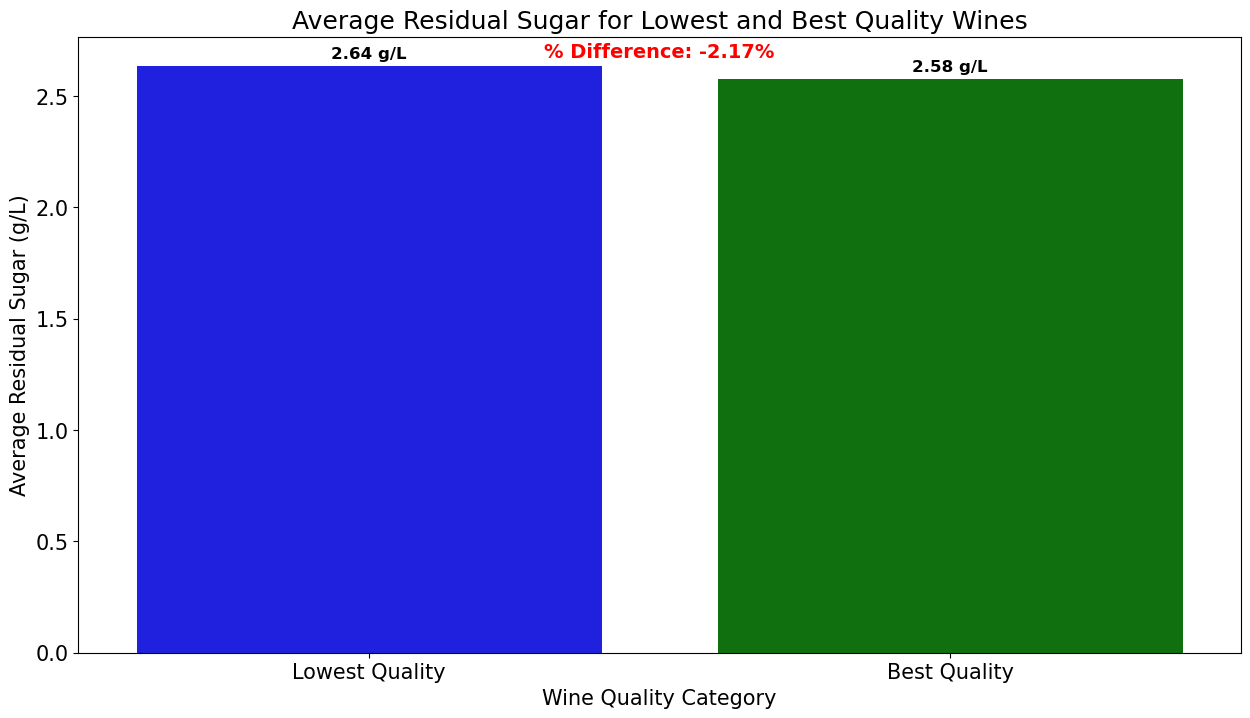

In [14]:
# Identify the highest and lowest quality scores in the dataset
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()

# Filter the dataset for the highest and lowest quality wines
best_quality_wines = df[df['quality'] == highest_quality]
lowest_quality_wines = df[df['quality'] == lowest_quality]

# Calculate the average residual sugar for both groups
average_residual_sugar_best = best_quality_wines['residual sugar'].mean()
average_residual_sugar_lowest = lowest_quality_wines['residual sugar'].mean()
# Calculate the percentage difference between the average residual sugars
percentage_difference = ((average_residual_sugar_best - average_residual_sugar_lowest) / average_residual_sugar_lowest) * 100

# Plotting using seaborn barplot
plt.figure(figsize=(15, 8))
sns.barplot(x=['Lowest Quality', 'Best Quality'], 
            y=[average_residual_sugar_lowest, average_residual_sugar_best], 
            palette=['blue', 'green'])

# Annotating the bars with their values
for i, value in enumerate([average_residual_sugar_lowest, average_residual_sugar_best]):
    plt.text(i, value + 0.02, f'{value:.2f} g/L', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Indicating the percentage difference
plt.text(0.5, max(average_residual_sugar_lowest, average_residual_sugar_best) + 0.04, 
         f'% Difference: {percentage_difference:.2f}%', 
         ha='center', fontsize=14, fontweight='bold', color='red')

plt.title('Average Residual Sugar for Lowest and Best Quality Wines')
plt.ylabel('Average Residual Sugar (g/L)')
plt.xlabel('Wine Quality Category')

# Show the plot
plt.show()


## Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

**`Conclusion:`**

- Higher volatile acidity moderately correlates with lower wine quality (-0.39).

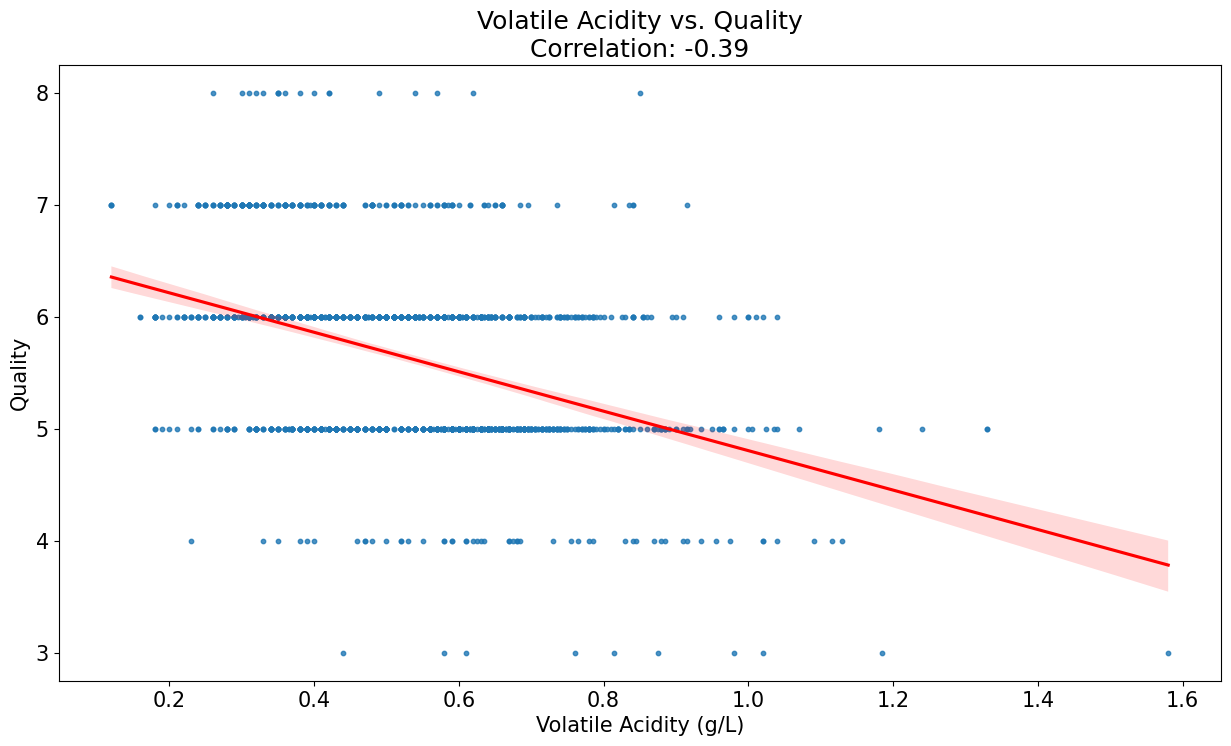

In [15]:
# Calculate the correlation coefficient between 'volatile acidity' and 'quality'
correlation_volatile_acidity = df['volatile acidity'].corr(df['quality'])

# Scatter plot with regression line to visualize the relationship between volatile acidity and wine quality
plt.figure(figsize=(15, 8))
sns.regplot(x='volatile acidity', y='quality', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title(f'Volatile Acidity vs. Quality\nCorrelation: {correlation_volatile_acidity:.2f}')
plt.xlabel('Volatile Acidity (g/L)')
plt.ylabel('Quality')


# Show the plots
plt.show()



# Decision Tree (Accuracy = 50.7%)

In [16]:
# Import necessary libraries for training a Decision Tree model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for training
X = df1.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df1['quality']  # Target variable (wine quality)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Predict the quality of the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Display the accuracy and classification report
accuracy_dt

0.5073529411764706

# Random Forest (Accuracy = 66.9%)

In [17]:
# Import necessary library for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for training
X = df1.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df1['quality']  # Target variable (wine quality)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Foraccuracy_score
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100,criterion = 'entropy')

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predict the quality of the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display the accuracy and classification report
accuracy_rf

0.6691176470588235